## Step 1 - Load the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

In [3]:
df.head()    # 1st five rows of the dataset

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape  # Total number of rows, columns in the dataset

(2823, 25)

## Step 2 - Understanding Data

In [5]:
# Checking structure of the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
# Summary statistics
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## Step 3 - Cleaning the dataset

In [7]:
df.isna().sum()   # Total null values in each columns

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

We can see that there are too many null values in the **"ADDRESSLINE2"**, **"STATE"** & **"TERRITORY"** columns of the dataset so we won't be dropping the records where these null values are there otherwise the structure of dataset will be hampered.        

In [14]:
# Checking no.of duplicate rows
df.duplicated().sum()

0

Hence, there are no duplicate rows in the dataset so nothing to be dropped.

In [12]:
# Checking datatype of "ORDERDATE" column
df['ORDERDATE'].dtype

dtype('O')

#### The "orderdate" column is of object datatype, it needs to be converted to datetime format in order to get monthly and seasonal trends.

In [13]:
# Converting "ORDERDATE" column to datetime type
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE'].head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]

Now, we can see that the **"ORDERDATE"** column has been successfully converted to datetime type.

## Step 4 - Calculating sales metrics

In [15]:
total_sales = df['SALES'].sum() # Total sales
total_sales

10032628.85

In [16]:
avg_sales = df['SALES'].mean() # Average value of sales
avg_sales

3553.889071909316

In [17]:
max_sales = df['SALES'].max()    # Maximum sales
max_sales

14082.8

In [18]:
min_sales = df['SALES'].min()   # Minimum sales
min_sales

482.13

### Calculating Total sales based on each category

In [19]:
# Calculating total sales of each order status 
df.groupby("STATUS")["SALES"].sum()

STATUS
Cancelled      194487.48
Disputed        72212.86
In Process     144729.96
On Hold        178979.19
Resolved       150718.28
Shipped       9291501.08
Name: SALES, dtype: float64

From above, we can see that the total sales for **shipped** status is the most which is **9291501.08**, followed by **cancelled** status **194487.48**

In [20]:
df['PRODUCTLINE'].value_counts()   # Frequency of each values of the 'PRODUCTLINE' column

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [21]:
# Calculating total sales of each product line
df.groupby("PRODUCTLINE")["SALES"].sum()

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

From above, we can see that the total sales for **classic cars** is the most which is **3919615.66**, followed by **vintage cars 1903150.84**

In [22]:
df['DEALSIZE'].value_counts()  

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

 From the above, we get to know that most orders are **small** or **medium** deals.

In [23]:
# Calculating total sales of each deal size
df.groupby("DEALSIZE")["SALES"].sum()

DEALSIZE
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: SALES, dtype: float64

From above, we can see that the total sales for **medium-size** deal is the most which is **6087432.24**

### Calculating Total sales based on region wise

In [24]:
# Calculating total sales of each state
df.groupby("STATE")["SALES"].sum()

STATE
BC                149873.77
CA               1505542.23
CT                238661.28
Isle of Wight      78240.84
MA                666443.72
NH                131685.30
NJ                 83228.19
NSW               305567.11
NV                 82751.08
NY                646343.76
Osaka              67605.07
PA                273327.27
Quebec             74204.79
Queensland         59469.12
Tokyo             120562.74
Victoria          265586.87
Name: SALES, dtype: float64

From above, we can see that the total sales is the most in **California** which is 1505542.23

In [25]:
df['COUNTRY'].value_counts().head(10)    # These are top 10 countries with higher number of order placed 

USA          1004
Spain         342
France        314
Australia     185
UK            144
Italy         113
Finland        92
Norway         85
Singapore      79
Canada         70
Name: COUNTRY, dtype: int64

From the above, we get to know that the most number of order placed from **USA**, followed by major **European** countries.

In [26]:
# Calculating total sales of each country
df.groupby("COUNTRY")["SALES"].sum()

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3627982.83
Name: SALES, dtype: float64

From above, we can see that the total sales is the most in **USA** which is **3627982.83**

## Step 5 - Visualizations

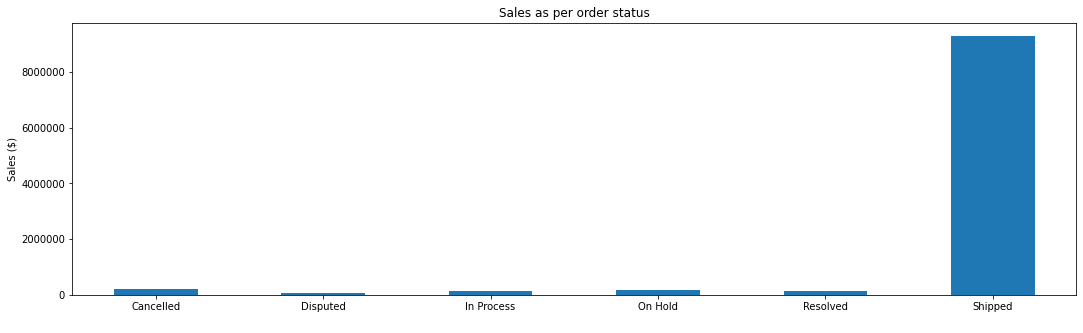

In [27]:
# Checking total sales for each order status in bar graph
sales_by_status = df.groupby("STATUS")["SALES"].sum()
sales_by_status.plot(kind='bar', figsize = (18,5))

plt.title("Sales as per order status")
plt.xlabel(" ")
plt.ylabel("Sales ($)")
plt.xticks(rotation = 0)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Inference**  :-

- More than 90% of total sales value belongs to the shipped status.
- Orders in On Hold, In Process, and Disputed represent potential or at-risk revenue.
- Minimizing cancellations and speeding up fulfillment can significantly improve revenue realization.

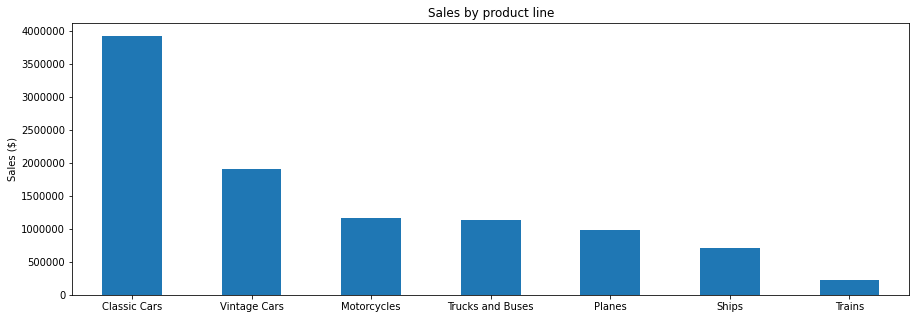

In [28]:
# Checking total sales for each product line in bar graph
sales_by_productline = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending = False)
sales_by_productline.plot(kind='bar', figsize = (15,5))

plt.title("Sales by product line")
plt.xlabel(" ")
plt.ylabel("Sales ($)")
plt.xticks(rotation = 0)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Inference** :-

- Classic cars are the top-selling product line by a top margin.
- Vintage cars follow after that but significantly behind classic cars.
- Trains and ships generate the lowest revenue.

- Opportunity to optimize the product portfolio by :-
    - Doubling down on high-performing categories
    - Rationalizing low-performing ones

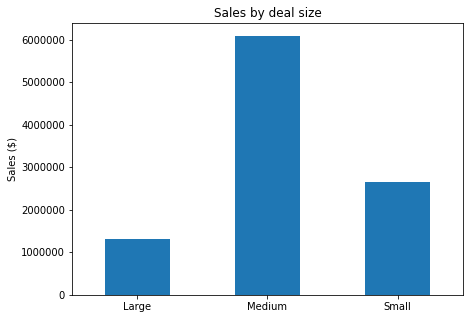

In [29]:
# Checking total sales for each deal size in bar graph
sales_by_dealsize = df.groupby("DEALSIZE")["SALES"].sum()
sales_by_dealsize.plot(kind='bar', figsize = (7,5))

plt.title("Sales by deal size")
plt.xlabel(" ")
plt.ylabel("Sales ($)")
plt.xticks(rotation = 0)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Insights** :-

- Medium-sized orders drive the highest overall revenue, forming the core of the business.
- Large deals, while valuable individually, occur infrequently and contribute the least revenue.

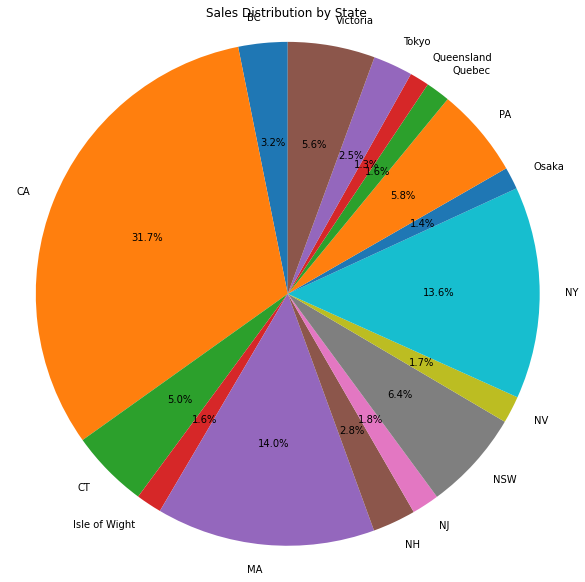

In [30]:
# Checking total sales for each state in pie chart
sales_by_state = df.groupby("STATE")["SALES"].sum()
sales_by_state.plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',   # show percentage
    startangle=90,
    ylabel=''            # remove default ylabel
)

plt.title("Sales Distribution by State")
plt.axis('equal')        # makes the pie circular
plt.show()

**Insights** :-

- The California state is the dominant market, driving more than double the revenue of the next-largest state.
- Over-dependence on a few states can pose business risk.
- Diversifying sales across regions can improve stability.

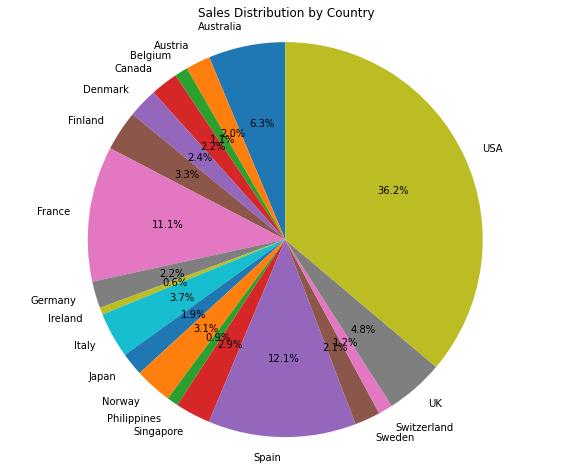

In [31]:
# Checking total sales for each country in pie chart
sales_by_country = df.groupby("COUNTRY")["SALES"].sum()

sales_by_country.plot(
    kind='pie',
    figsize=(10, 8),
    autopct='%1.1f%%',   # show percentage
    startangle=90,
    ylabel=''            # remove default ylabel
)

plt.title("Sales Distribution by Country")
plt.axis('equal')        # makes the pie circular
plt.show()

**Insights** :-

- Revenue is geographically concentrated, especially in the USA.
- Over-reliance on a single country introduces business risk.
- Expanding sales in mid- and low-contributing countries can improve :-
    - Revenue stability
    - Global market reach

### Seasonal Revenue Patterns

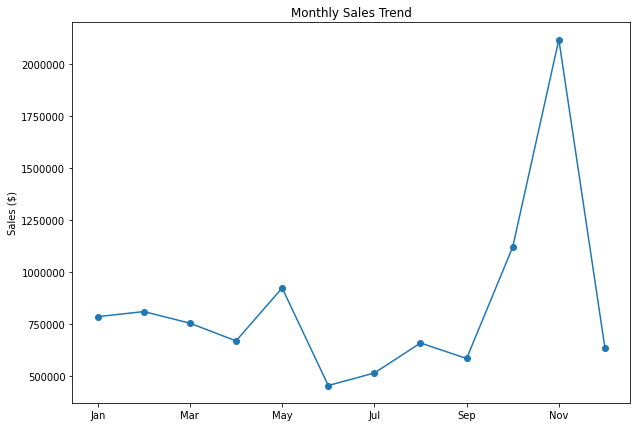

In [32]:
# Checking monthly trend of sales
sales_by_month = df.groupby("MONTH_ID")["SALES"].sum()
sales_by_month.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales_by_month.plot(kind = "line", marker = "o", figsize = (10,7))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Insights** :-

- Mid-year (May-July) is the weakest period in terms of sales revenue.
- The strongest period for sales revenue was after September primarily during the holiday season.
- Sales decline in December compared to November.

### Year-over-year revenue performance

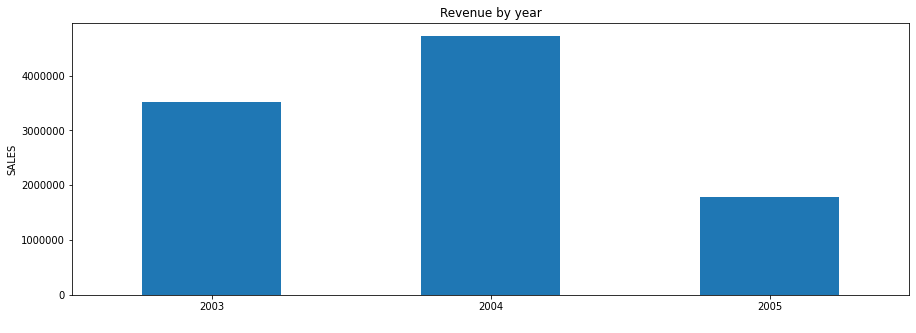

In [33]:
# Checking yearly trend of sales
sales_by_year = df.groupby("YEAR_ID")["SALES"].sum()
sales_by_year.plot(kind = "bar", figsize = (15,5))
plt.title("Revenue by year")
plt.xlabel(" ")
plt.ylabel("SALES")
plt.xticks(rotation = 0)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Insights** :-  

- The business shows overall growth from 2003 to 2004.
- Apparent decline in 2005 is likely due to incomplete data.
- Overall trend indicates a healthy and growing business.